In [1]:
import pyscreenshot as ImageGrab
import time

def one_time():
    images_folder = "captured_images/oww/"
    
    # Capture and save images
    for i in range(0, 100):
        time.sleep(4)
        im = ImageGrab.grab(bbox=(60, 170, 400, 550))  # x1, y1, x2, y2
        print("saved......", i)
        im.save(images_folder + str(i) + '.png')
        print("clear screen now and redraw now........")
        


In [5]:
import cv2
import csv
import glob

# Define the labels for digits and alphabets
digit_labels = list(range(10))
alphabet_labels = ['a', 'aaa', 'e', 'eee', 'u', 'uuu', 'ru', 'ye', 'yeee', 'ai', 'o', 'ooo', 'oww', 'am', 'aha']

# Define the header for the CSV file
header = ["label"]
for i in range(0, 784):
    header.append("pixel" + str(i))

with open('dataset2.csv', 'a') as f:
    writer = csv.writer(f)
    writer.writerow(header)

# Process digits and alphabets
for label in digit_labels + alphabet_labels:
    dirList = glob.glob("captured_images/" + str(label) + "/*.png")
    
    for img_path in dirList:
        im = cv2.imread(img_path)
        im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        im_gray = cv2.GaussianBlur(im_gray, (15, 15), 0)
        roi = cv2.resize(im_gray, (28, 28), interpolation=cv2.INTER_AREA)
        
        data = []
        data.append(label)
        rows, cols = roi.shape
        
        # Add pixels one by one into the data array
        for i in range(rows):
            for j in range(cols):
                k = roi[i, j]
                if k > 90:
                    k = 1
                else:
                    k = 0
                data.append(k)
                
        with open('dataset2.csv', 'a') as f:
            writer = csv.writer(f)
            writer.writerow(data)
    #load the dataset
import pandas as pd
from sklearn.utils import shuffle
data  =pd.read_csv('dataset2.csv',dtype=str)
# Identify duplicates
duplicates = data[data.duplicated()]

# Remove duplicates
data = data.drop_duplicates()

# Shuffle the dataset
data = shuffle(data)

data=shuffle(data)
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
693,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
798,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2180,ooo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1072,a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
607,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2899,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
759,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
544,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2773,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#separation of dependent and independent variable
X = data.drop(["label"],axis=1)
Y= data["label"]

am


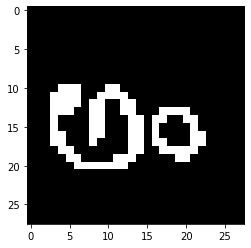

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

# Load the image
idx = 2383
img = X.loc[idx].values.reshape(28, 28)
print(Y[idx])

# Convert the image data type to float
img_float = img.astype(float)

# Display the image using matplotlib
plt.imshow(img_float, cmap='gray')
plt.show()

In [8]:
#Train-Test split
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y, test_size = 0.1)

In [9]:
import joblib
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder

# Assuming train_x and train_y_encoded are NumPy arrays
train_x_float = pd.DataFrame(train_x)

# Convert train_y_encoded to a DataFrame or Series
train_y_encoded = pd.Series(train_y)

# Align train_x_float and train_y_encoded based on the index
train_x_float = train_x_float.loc[train_y_encoded.index[:-1]]
train_x_float = train_x_float.apply(pd.to_numeric, errors='coerce')

In [10]:
#train_x_float.isnull().sum()
#train_x_float.replace(1, np.nan, inplace=True)
train_x_float.fillna(train_x_float.mean(), inplace=True)

In [11]:
# Create and fit the SVC model
classifier = SVC(kernel="linear", random_state=6)
classifier.fit(train_x_float, train_y_encoded[:-1])


# Save the model using joblib
joblib.dump(classifier, "model/digit_recognizer")

['model/digit_recognizer']

In [ ]:
numeric_columns = test_x.select_dtypes(include=['number']).columns
test_x_float = test_x[numeric_columns].astype(float)


In [10]:
import cv2
import numpy as np
import os
import csv

# Parent folder path containing the digit and alphabet folders
parent_folder_path = "C:/Users/Rumana/Desktop/handwrittenKannada/captured_images"

# Define the header for the CSV file
header = ["label"]
for i in range(0, 784):
    header.append("pixel" + str(i))

with open('dataset2.csv', 'a') as f:
    writer = csv.writer(f)
    writer.writerow(header)

# Load the captured images and preprocess them
train_x = []
train_y = []

for folder_name in os.listdir(parent_folder_path):
    folder_path = os.path.join(parent_folder_path, folder_name)
    if os.path.isdir(folder_path):
        label = folder_name  # The folder name is the label
        
        for filename in os.listdir(folder_path):
            if filename.endswith(".png"):
                image_path = os.path.join(folder_path, filename)
                image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                resized_image = cv2.resize(image, (28, 28), interpolation=cv2.INTER_AREA)
                flattened_image = resized_image.flatten() / 255.0  # Normalize the pixel values
                train_x.append(flattened_image)
                train_y.append(label)
                
                # Add the image data to the CSV file
                data = [label] + list(flattened_image)
                with open('dataset2.csv', 'a') as f:
                    writer = csv.writer(f)
                    writer.writerow(data)

# Convert the lists to numpy arrays
train_x = np.array(train_x)
train_y = np.array(train_y)

# Save the training dataset as numpy arrays
np.save("C:/Users/Rumana/Desktop/handwrittenKannada/captured_images/train_x_float.npy", train_x)
np.save("C:/Users/Rumana/Desktop/handwrittenKannada/captured_images/train_y_encoded.npy", train_y)


In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Load the training dataset
train_x = np.load("C:/Users/Rumana/Desktop/handwrittenKannada/captured_images/train_x_float.npy")
train_y = np.load("C:/Users/Rumana/Desktop/handwrittenKannada/captured_images/train_y_encoded.npy")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.1, random_state=42)

# Train the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred) * 100

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy: {:.2f}%".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))


Accuracy: 79.28%
Precision: 0.83
Recall: 0.79
F1-score: 0.79


In [1]:
import joblib
import cv2
import numpy as np
import time
import pyscreenshot as ImageGrab

model = joblib.load("model/digit_recognizer")  # Update with the correct path to your Kannada digit and alphabet recognition model

images_folder = "img/"

character_actual = None  # Variable to store the actual digit or alphabet drawn by the user

while True:
    img = ImageGrab.grab(bbox=(60, 170, 400, 500))  # Adjust the coordinates to capture the appropriate region

    img.save(images_folder + "img.png")
    im = cv2.imread(images_folder + "img.png")
    im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im_gray = cv2.GaussianBlur(im_gray, (15, 15), 0)

    # Threshold the image
    ret, im_th = cv2.threshold(im_gray, 100, 255, cv2.THRESH_BINARY)
    roi = cv2.resize(im_th, (28, 28), interpolation=cv2.INTER_AREA)

    rows, cols = roi.shape

    X = []

    # Add pixel one by one into the data array
    for i in range(rows):
        for j in range(cols):
            k = roi[i, j]
            if k > 100:
                k = 1
            else:
                k = 0
            X.append(k)

    X = np.array(X)  # Convert X to a NumPy array
    if not any(X):
        character = "noCharVisible"
    else:
        prediction = model.predict(X.reshape(1, -1))  # Reshape X to a 2D array with shape (1, num_features)
        character = prediction[0]

    # Draw prediction and accuracy on the image
    cv2.putText(im,"Prediction: " + str(character), (20, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2, cv2.LINE_AA)

    cv2.startWindowThread()
    cv2.namedWindow("Result")
    cv2.imshow("Result", im)

    # Wait for user input to set the actual digit or alphabet
    key = cv2.waitKey(1)
    if key == 27:  # If ESC key is pressed, exit the loop
        break

cv2.destroyAllWindows()
